# Proposal for Group 7

## 1. Data
### 1.1 data source
Our purpose for this project is to classify animal images into 15 categories through CNN model. Dataset comes from Kaggle.com.All the images present in TF records format have already been resized to 256 x 256 pixels and normalized.

### 1.2 data read

Viewing first image: Validation Data/Validation Data/Zebra/Zebra-Valid (271).jpeg


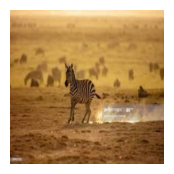

In [13]:
import zipfile;import io;from PIL import Image;import matplotlib.pyplot as plt;zip_path = "archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zebra_files = [file for file in zip_ref.namelist() if file.startswith("Validation Data/Validation Data/Zebra/") and file.endswith(".jpeg")]
    if zebra_files:
        first_image_file = zebra_files[0];print(f"Viewing first image: {first_image_file}")
        with zip_ref.open(first_image_file) as image_file:
            image = Image.open(io.BytesIO(image_file.read()));plt.figure(figsize=(2,2));plt.imshow(image);plt.axis('off');plt.show()

## 2. descriptions of the variables
1,Input Image(RGB graphs with 3 channels):
Our input will be 3 dimensional integer matrices with index as (H X W X RGB) with range be 0-255.

2,Label:
Once image is put into the model, a String of predicted label will be added to it. This helps us match the image with its category. 

3,Class Names:
We set up a list of String to describe the categories we would like to classify into.

## 3. statistical methods
The statistical methods we plan to use is as follows,

1, Pooling: Each small section of the image can be summrised into one larger section with critical features included.

2, Data Augmentation:We apply random transformation,including rotation, flipping and zooming etc., to increase the diversity of training data.

3, Regularization: In the fully connected layers, we apply L1 and L2 penalties to the loss function.

## 4. computational steps
### 4.1 Create Parallel Computing Structure
We allocate the smaller batches of images to different GPUs for simultaneous computation, through applying DistributedDataParallel to wrapper the model.Proper DistributedSampler will be used to distribute different train data and layers of CNN mdodels to GPUs.
### 4.2, Work on GPU
We use the following code to ask GPU working on computating process:

In [2]:
#request_cpus = 4          
#request_gpus = 1          
#request_memory = 16GB      

### 4.3 Model Backpropagation
We will minimise Cross Entropy as our loss function,and use Adam to update weights in the network. We also use DistributedDataParallel to synchronize all gradients of GPUs. 